In [1]:
import pandas as pd 
import datatable as dt 
import matplotlib.pyplot as plt 
import seaborn as sns

C:\Users\gtrom\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# BONUS QUESTION B

### Assume users publish their posts the same day pictures or videos are taken: Are there users that have visited the same location on the same day? How about the same week? Extract the results and explain them.

#### So, we have to import all columns of the three datasets to manage to compare them and extract the reuslts .

1. From **instagram_posts** we pick **profile_id**, **post_id**, **location_id**(post has a tag location and this is id of that location), **cts**(date when the post was created, we need it to compare with date when locations was visited)
1. From **instagram_profiles** we pick **profile_id**(to compare with those in posts and take only profile_id are in both /~.csv files) and **profile_name**
1. From **instagram_locations** we pick **id**(related to location_id on posts), **name**, **cts**(date when location was visited), **lat**(latitude), **lng**(longitude)

#### Data from posts

In [2]:
post_data = dt.fread('instagram_posts.csv', sep='\t', columns={"profile_id", "post_id", "location_id", "cts"}).to_pandas()
post_data

,post_id,profile_id,location_id,cts
0,BXdjjUlgcgq,2.237948e+09,1.022366e+15,2017-08-06 20:06:57
1,BVg0pbolYBC,5.579335e+09,4.574268e+14,2017-06-19 09:31:16
2,BRgkjcXFp3Q,3.134296e+08,4.574268e+14,2017-03-11 20:05:03
3,BKTKeNhjEA7,1.837593e+09,4.574268e+14,2016-09-13 16:27:16
4,8-NQrvoYLX,1.131527e+09,4.574268e+14,2015-10-18 10:19:27
...,...,...,...,...
42710192,BcpWMWGBfxh,5.556457e+09,4.574268e+14,2017-12-13 15:38:04
42710193,Ba6LZWwlCl8,3.371865e+08,4.574268e+14,2017-10-31 11:28:01
42710194,BPN0kM1hYUw,3.289886e+09,4.574268e+14,2017-01-13 20:16:37
42710195,BxsZ8nDBr-L,8.536366e+09,4.267235e+06,2019-05-20 20:07:52


#### A bit of preprocessing

In [3]:
post_data.isna().sum()

post_id               0
profile_id      2583292
location_id    12972772
cts                3332
dtype: int64

In [4]:
post_data = post_data.dropna()
post_data[['profile_id', 'location_id']] = post_data[['profile_id', 'location_id']].astype('int64')
post_data

C:\Users\gtrom\AppData\Local\Temp\ipykernel_18876\3601062550.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  post_data[['profile_id', 'location_id']] = post_data[['profile_id', 'location_id']].astype('int64')


,post_id,profile_id,location_id,cts
0,BXdjjUlgcgq,2237947779,1022366247837915,2017-08-06 20:06:57
1,BVg0pbolYBC,5579335020,457426771112991,2017-06-19 09:31:16
2,BRgkjcXFp3Q,313429634,457426771112991,2017-03-11 20:05:03
3,BKTKeNhjEA7,1837592700,457426771112991,2016-09-13 16:27:16
4,8-NQrvoYLX,1131527143,457426771112991,2015-10-18 10:19:27
...,...,...,...,...
42710192,BcpWMWGBfxh,5556457201,457426771112991,2017-12-13 15:38:04
42710193,Ba6LZWwlCl8,337186454,457426771112991,2017-10-31 11:28:01
42710194,BPN0kM1hYUw,3289886053,457426771112991,2017-01-13 20:16:37
42710195,BxsZ8nDBr-L,8536366360,4267235,2019-05-20 20:07:52


#### Operations on 'cts' column to pick only the date(we're interested only in the day)   

In [5]:
# Changing object type column to datetime
post_data['cts'] = pd.to_datetime(post_data.cts)
# Creating new column with just the date
post_data['date'] = post_data['cts'].dt.date
post_data = post_data.drop('cts', axis=1)
post_data

C:\Users\gtrom\AppData\Local\Temp\ipykernel_18876\1002409095.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  post_data['cts'] = pd.to_datetime(post_data.cts)
C:\Users\gtrom\AppData\Local\Temp\ipykernel_18876\1002409095.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  post_data['date'] = post_data['cts'].dt.date


,post_id,profile_id,location_id,date
0,BXdjjUlgcgq,2237947779,1022366247837915,2017-08-06
1,BVg0pbolYBC,5579335020,457426771112991,2017-06-19
2,BRgkjcXFp3Q,313429634,457426771112991,2017-03-11
3,BKTKeNhjEA7,1837592700,457426771112991,2016-09-13
4,8-NQrvoYLX,1131527143,457426771112991,2015-10-18
...,...,...,...,...
42710192,BcpWMWGBfxh,5556457201,457426771112991,2017-12-13
42710193,Ba6LZWwlCl8,337186454,457426771112991,2017-10-31
42710194,BPN0kM1hYUw,3289886053,457426771112991,2017-01-13
42710195,BxsZ8nDBr-L,8536366360,4267235,2019-05-20


#### Data from profiles and a bit of preprocessing

In [7]:
prof_data = dt.fread('instagram_profiles.csv', sep='\t', columns={"profile_id", "profile_name"}).to_pandas()

In [8]:
print(prof_data.isna().sum())
prof_data = prof_data.dropna()
prof_data['profile_id'] = prof_data['profile_id'].astype('int64')
prof_data

profile_id      32447
profile_name        0
dtype: int64


,profile_id,profile_name
0,4721049632,jphillip033
1,590583002,mama_haas
2,1074146658,yellowlightbreen
3,1472038842,tec1025
4,3531420803,luckyfluff
...,...,...
4509581,1418322351,karenarkesteyn
4509582,13407035,jornvlaeminck
4509583,6007353778,s_degol
4509584,23389895,anwilms


#### Data from locations and a bit of preprocessing

In [9]:
loc_data = dt.fread('instagram_locations.csv', sep='\t', columns={"id", "name", "cts", "lat", "lng"}).to_pandas()
loc_data

,id,name,lat,lng,cts
0,110296492939207,"Playa de Daimuz - Valencia, España",-0.139475,38.974391,2019-05-29 01:21:29.987
1,274391278,Nová Vieska,18.466667,47.866667,2019-05-29 01:21:38.037
2,148885595789195,Everest Today,85.330150,27.701960,2019-05-29 01:21:46.295
3,263258277,BULAC - Bibliothèque universitaire des langues...,2.375995,48.827240,2019-05-29 01:21:54.355
4,406147529857708,ABC Cable Networks Group,-118.341864,34.153265,2019-04-02 15:22:55.703
...,...,...,...,...,...
1022653,873926439475785,Baby Season,-63.185307,-17.786130,2019-05-29 01:20:57.078
1022654,390707529,Cueva Carvajal,-100.359619,25.653550,2019-05-29 01:21:04.434
1022655,1205466612894741,The Cheesecake Factory,-87.843649,41.618551,2019-05-29 01:21:13.404
1022656,286794844,Plimmer Towers,174.775000,-41.285800,2019-05-29 01:21:21.628


In [10]:
loc_data.isna().sum()

id         0
name       0
lat     6163
lng     6163
cts        0
dtype: int64

In [11]:
loc_data = loc_data.dropna()
loc_data

,id,name,lat,lng,cts
0,110296492939207,"Playa de Daimuz - Valencia, España",-0.139475,38.974391,2019-05-29 01:21:29.987
1,274391278,Nová Vieska,18.466667,47.866667,2019-05-29 01:21:38.037
2,148885595789195,Everest Today,85.330150,27.701960,2019-05-29 01:21:46.295
3,263258277,BULAC - Bibliothèque universitaire des langues...,2.375995,48.827240,2019-05-29 01:21:54.355
4,406147529857708,ABC Cable Networks Group,-118.341864,34.153265,2019-04-02 15:22:55.703
...,...,...,...,...,...
1022653,873926439475785,Baby Season,-63.185307,-17.786130,2019-05-29 01:20:57.078
1022654,390707529,Cueva Carvajal,-100.359619,25.653550,2019-05-29 01:21:04.434
1022655,1205466612894741,The Cheesecake Factory,-87.843649,41.618551,2019-05-29 01:21:13.404
1022656,286794844,Plimmer Towers,174.775000,-41.285800,2019-05-29 01:21:21.628


#### Operations on 'cts' column to pick only the date(we're interested only in the day)

In [12]:
# Changing object type column to datetime
loc_data['cts'] = pd.to_datetime(loc_data.cts)
# Creating new column with just the date
loc_data['date'] = loc_data['cts'].dt.date
loc_data = loc_data.drop('cts', axis=1)
loc_data

C:\Users\gtrom\AppData\Local\Temp\ipykernel_18876\4202767235.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loc_data['cts'] = pd.to_datetime(loc_data.cts)
C:\Users\gtrom\AppData\Local\Temp\ipykernel_18876\4202767235.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loc_data['date'] = loc_data['cts'].dt.date


,id,name,lat,lng,date
0,110296492939207,"Playa de Daimuz - Valencia, España",-0.139475,38.974391,2019-05-29
1,274391278,Nová Vieska,18.466667,47.866667,2019-05-29
2,148885595789195,Everest Today,85.330150,27.701960,2019-05-29
3,263258277,BULAC - Bibliothèque universitaire des langues...,2.375995,48.827240,2019-05-29
4,406147529857708,ABC Cable Networks Group,-118.341864,34.153265,2019-04-02
...,...,...,...,...,...
1022653,873926439475785,Baby Season,-63.185307,-17.786130,2019-05-29
1022654,390707529,Cueva Carvajal,-100.359619,25.653550,2019-05-29
1022655,1205466612894741,The Cheesecake Factory,-87.843649,41.618551,2019-05-29
1022656,286794844,Plimmer Towers,174.775000,-41.285800,2019-05-29


#### At this point we can do the first merge based on profile_id column, so now we have all profiles are in both dataframes

In [13]:
prof_post_data = post_data.merge(prof_data, on = 'profile_id')
prof_post_data

,post_id,profile_id,location_id,date,profile_name
0,BXdjjUlgcgq,2237947779,1022366247837915,2017-08-06,andylund_
1,BeyPed5hKj9,2237947779,30776247,2018-02-04,andylund_
2,Bunhd1DFVAG,2237947779,1022366247837915,2019-03-05,andylund_
3,Bppi85gliQK,2237947779,1022366247837915,2018-11-01,andylund_
4,BuDfIyslzfw,2237947779,669787846510176,2019-02-19,andylund_
...,...,...,...,...,...
13646360,BKJFe7mjAV3,550703154,720640031,2016-09-09,baraxolka_krd_lider
13646361,BKI_EMBjwAT,550703154,720640031,2016-09-09,baraxolka_krd_lider
13646362,BKI-1DmD6cR,550703154,720640031,2016-09-09,baraxolka_krd_lider
13646363,BKIs7d-jmf2,550703154,720640031,2016-09-09,baraxolka_krd_lider


#### Now we can do the merge with locations dataset:

1. First we pick **prof_post_data** above and merge with locations dataset 
1. The merge is done on **location_id** and **date** columns from the first dataframe with **id** and **date** columns from loc_data so that we have the values that match between the two dataframes in the columns  
1. Finally we oder the indexes of the columns

#### This is the dataset that contains all the profiles that posted in those days in which they were in that site

In [15]:
merged_data = prof_post_data.merge(loc_data, left_on = ['location_id', 'date'], right_on = ['id', 'date']).drop('id', axis=1)
merged_data = merged_data.reindex(columns=['profile_id', 'profile_name', 'post_id', 'location_id', 'name', 'lat', 'lng', 'date'])
merged_data

,profile_id,profile_name,post_id,location_id,name,lat,lng,date
0,205039053,yonakw,Bx-Tw45BYHN,227670432,Royal Commonwealth Pool,-3.173243,55.939008,2019-05-27
1,13373620641,peterlanestneots,BxUq7XDgFdV,626820291,"Roxton, Bedfordshire",-0.310700,52.176239,2019-05-11
2,1945800451,mgdalenaf,Byhi19WA3K2,217570048806370,Eatlah,106.822530,-6.192730,2019-06-10
3,3505953,dezzbrown_,BxndAE6hIgt,1048744405307751,Village Gym,-4.289382,55.856266,2019-05-18
4,9030431543,tatianarestnichki,BxJ4u6YhMQr,1477616619024467,Ресторан Пиросмани сочи,40.743570,44.639840,2019-05-07
...,...,...,...,...,...,...,...,...
93104,6986068048,grigoriadam,ByFJ17cIM_Y,215864379,"Frankenthal, Rheinland-pfalz",8.355000,49.537200,2019-05-30
93105,1043646878,3zzaalgh,ByEV6KXlgOr,544032463,"34,000 Feet Above Sea Level",100.589216,13.769224,2019-05-30
93106,256212170,christiankm91,ByE6RHjAaSS,1912726599048035,Atelier - an Aviator Relaxium,12.643526,55.629062,2019-05-30
93107,7318715342,pisocietysw,ByEFRWEFya2,1030830182,CityGate Exeter,-3.534524,50.723566,2019-05-30


In [27]:
#profiles = merged_data.groupby('profile_id')
#for id_prof in profiles:
#    print(profiles.get_group('id_prof'))

KeyError: 'id_prof'

In [20]:
#from mpl_toolkits.basemap import Basemap

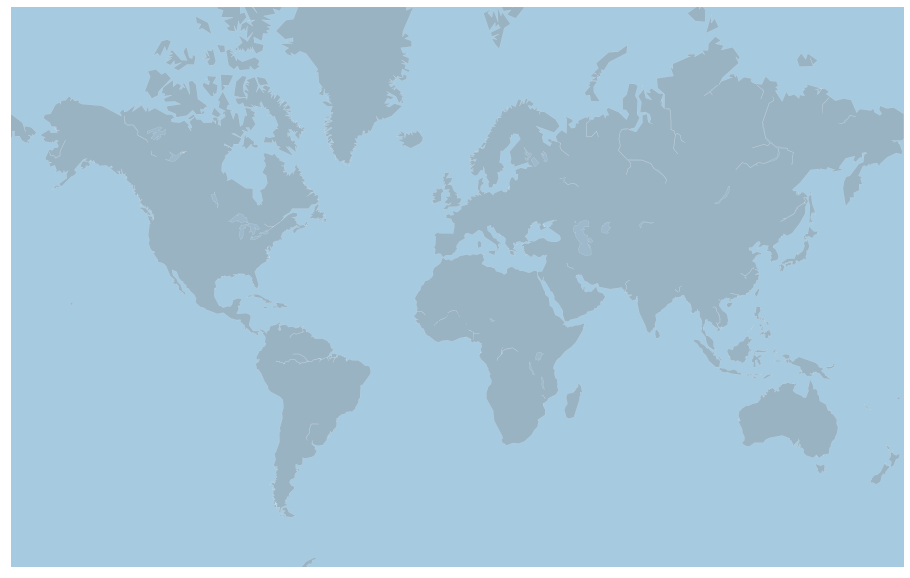

In [21]:
# Set the dimension of the figure
plt.rcParams["figure.figsize"]=16,12;

# Make the background map
m=Basemap(llcrnrlon=-180, llcrnrlat=-65, urcrnrlon=180, urcrnrlat=80, projection='merc');
m.drawmapboundary(fill_color='#A6CAE0', linewidth=0);
m.fillcontinents(color='grey', alpha=0.3);
m.drawcoastlines(linewidth=0.1, color="white");

RuntimeError: Can not put single artist in more than one figure

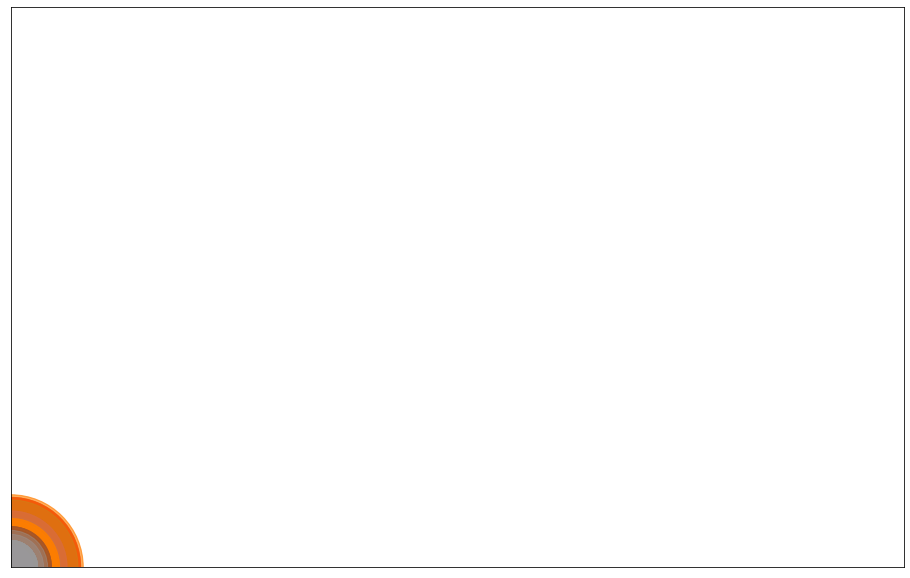

In [22]:
# prepare a color for each point depending on the continent.
merged_data['labels_enc'] = pd.factorize(merged_data['location_id'])[0]
 
# Add a point per position
m.scatter(
    x=merged_data['lng'], 
    y=merged_data['lat'], 
    s=merged_data['n_posts']/6, 
    alpha=0.4, 
    c=merged_data['labels_enc'], 
    cmap="Set1"
)

#### AT THIS POINT I SHOULD HAVE A DATAFRAME IN WHICH USERS HAVE POSTED POSTS IN THAT LOCATION ON THE SAME DAY BUT THERE'S A PROBLEM BECAUSE THIS FINAL PROF_POST_DATA HAVE THREE TIMES ROWS THAN LOC_DATA.

#### JONAS, IF YOU CAN CHECK THIS THE POINT B IS ALMOST DONE I THINK, PLEASE. I WANT TO TRY TO FINISH EVEN IF I HAVE LESS TIME TODAY AND TOMORROW.

#### MAYBE I THINK THE MERGE IS CORRECT!!